In [1]:
%matplotlib inline 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import gcsfs 
from matplotlib import cm
import warnings 
import seaborn as sns
import yaml

from xclim.indicators import cf 
from xclim.indicators import icclim, atmos, anuclim

# from science_validation_manual import *
from dc6_functions import * 
from scipy.stats import kstest

import dask
import dask.array as da
import dask.distributed as dd
import rhg_compute_tools.kubernetes as rhgk
import pandas as pd 

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

import json 

/tmp/ipykernel_22757/4096995225.py:25: DeprecationWarning: rhg_compute_tools and the associated command-line application rctools are
deprecated on catalyst clusters. use catalyst_compute_tools instead.
See https://gitlab.com/crs-catalyst/infrastructure/catalyst_compute_tools/-/issues/1
  import rhg_compute_tools.kubernetes as rhgk


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# plot_dir = '/gcs/impactlab-data/climate/downscaling/paper/'
plot_dir = '/home/jovyan/paper_figures/'

In [4]:
models_dict = get_cmip6_models()
ensemble_members = get_cmip6_ensemble_members()
grids = get_cmip6_grids()
institutions = get_cmip6_institutions()
ds_institutions = get_cmip6_institutions()
ds_institutions['MPI-ESM1-2-HR'] = 'MPI-M'

cities = get_diagnostic_cities()

In [5]:
len(cities)

17

In [6]:
city = 'Buenos Aires'
with open('/home/jovyan/paper_data/downscaled_{city}.json'.format(city=city)) as fp:
    downscaled_ks_full = json.load(fp)
    
with open('/home/jovyan/paper_data/gcms_{city}.json'.format(city=city)) as fp:
    gcms_ks_full = json.load(fp)

In [7]:
cities

['Tokyo',
 'Delhi',
 'Shanghai',
 'Sao Paulo',
 'Mexico City',
 'Cairo',
 'Dhaka',
 'New York',
 'Buenos Aires',
 'Istanbul',
 'Lagos',
 'Paris',
 'Moscow',
 'Miami',
 'Mumbai',
 'Manila',
 'London']

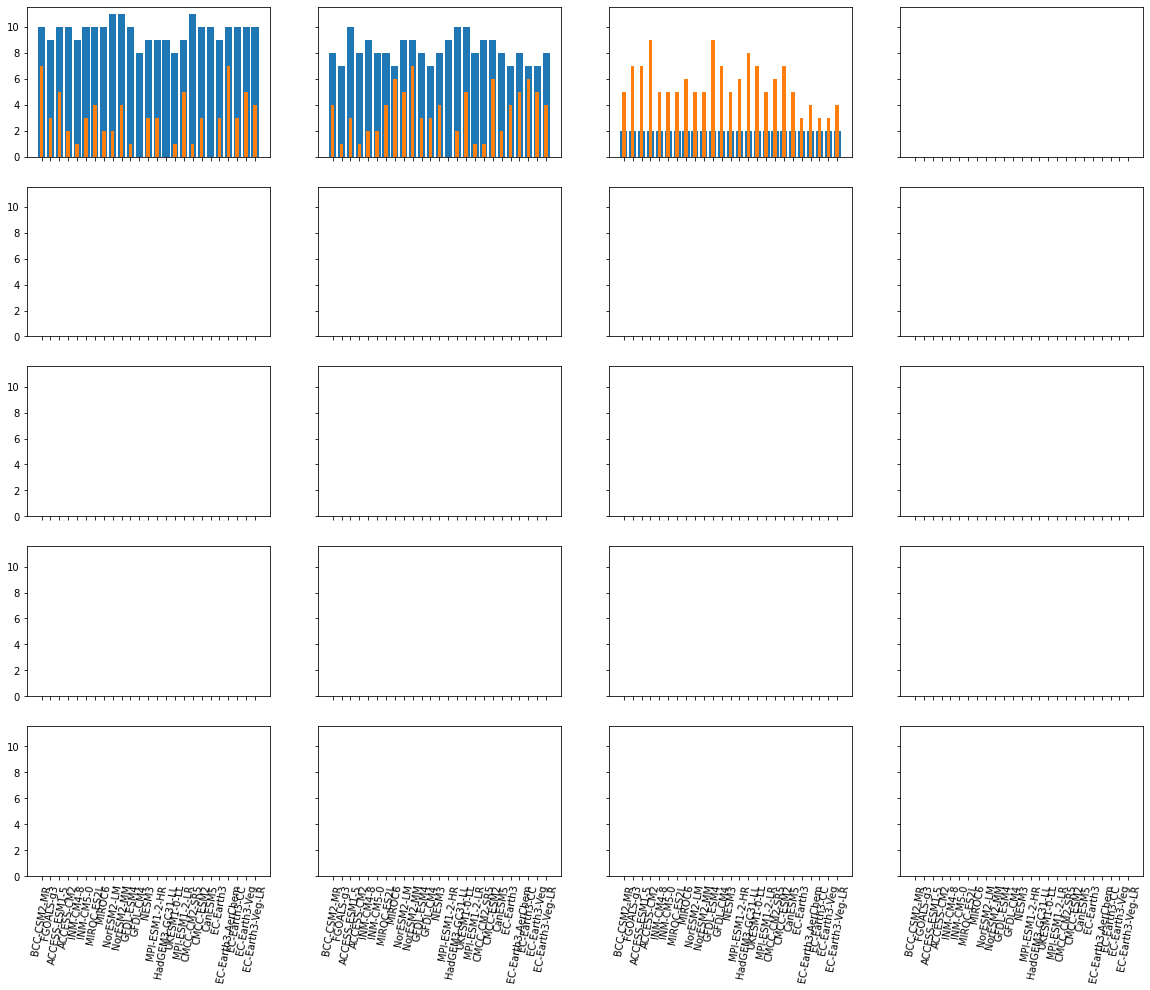

In [8]:
fig, axes = plt.subplots(5, 4, figsize=(20, 16), sharex=True,sharey=True)

cities_subset = ['Paris', 'Mumbai', 'Istanbul', 'Shanghai', 'Lagos', 'New York', 'Mexico City']

# for ax in axes.flat:

# axes_flattened = axes.flat
    
for i, city in enumerate(cities[1:4]):
    
    with open('/home/jovyan/paper_data/downscaled_{city}.json'.format(city=city)) as fp:
        downscaled_ks_full = json.load(fp)
    
    with open('/home/jovyan/paper_data/gcms_{city}.json'.format(city=city)) as fp:
        gcms_ks_full = json.load(fp)
        
    ax = axes.flat[i]
    
    ax.bar(*zip(*downscaled_ks_full.items()), width=0.8, linewidth=0.4, align='center', label='downscaled GCMs')
    ax.bar(*zip(*gcms_ks_full.items()), width=0.4, linewidth=0.4, align='center', label='raw GCMs')

# axes[4, 0].set_xticks(rotation=80)

axes[4, 0].tick_params(axis='x', rotation=80)
axes[4, 1].tick_params(axis='x', rotation=80)
axes[4, 2].tick_params(axis='x', rotation=80)
axes[4, 3].tick_params(axis='x', rotation=80)

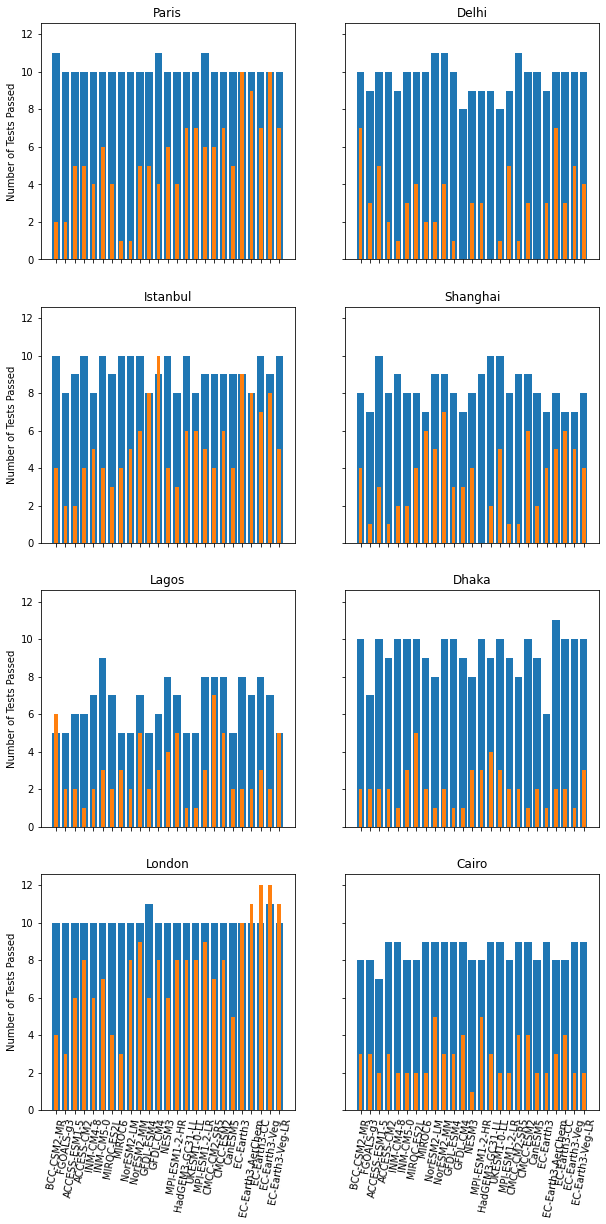

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20), sharex=True,sharey=True)

cities_subset = ['Paris', 'Delhi', 'Istanbul', 'Shanghai', 'Lagos', 'Dhaka', 'London', 'Cairo']
    
for i, city in enumerate(cities_subset):
    
    with open('/home/jovyan/paper_data/downscaled_{city}.json'.format(city=city)) as fp:
        downscaled_ks_full = json.load(fp)
    
    with open('/home/jovyan/paper_data/gcms_{city}.json'.format(city=city)) as fp:
        gcms_ks_full = json.load(fp)
        
    ax = axes.flat[i]
    
    ax.bar(*zip(*downscaled_ks_full.items()), width=0.8, linewidth=0.4, align='center', label='downscaled GCMs')
    ax.bar(*zip(*gcms_ks_full.items()), width=0.4, linewidth=0.4, align='center', label='raw GCMs')
    ax.set_title('{city}'.format(city=city))

axes[3, 0].tick_params(axis='x', rotation=80)
axes[3, 1].tick_params(axis='x', rotation=80)
axes[0, 0].set_ylabel('Number of Tests Passed')
axes[1, 0].set_ylabel('Number of Tests Passed')
axes[2, 0].set_ylabel('Number of Tests Passed')
axes[3, 0].set_ylabel('Number of Tests Passed')
'''axes[1, 2].tick_params(axis='x', rotation=80)
axes[1, 3].tick_params(axis='x', rotation=80)'''

plt.savefig(os.path.join(plot_dir, 'cities1_etccdi_indices.eps'), 
            bbox_inches='tight', dpi=200)

In [10]:
cities_subset2 = [item for item in cities if item not in cities_subset]
cities_subset2

['Tokyo',
 'Sao Paulo',
 'Mexico City',
 'New York',
 'Buenos Aires',
 'Moscow',
 'Miami',
 'Mumbai',
 'Manila']

figure with remaining cities e.g. `cities_subset2` 

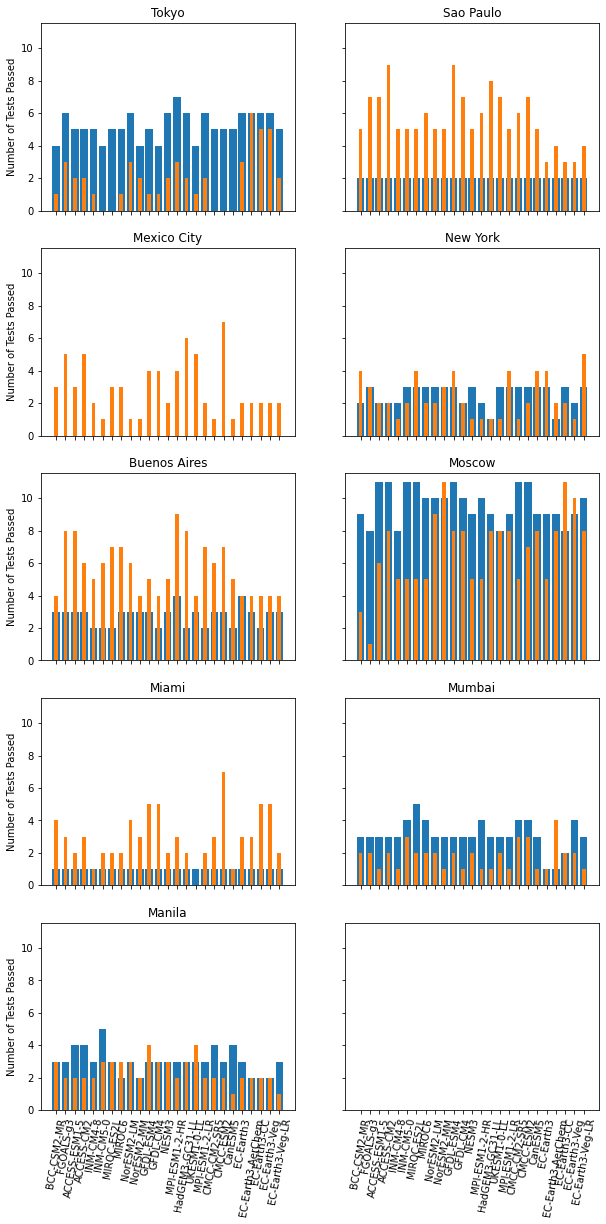

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20), sharex=True,sharey=True)
    
for i, city in enumerate(cities_subset2):
    
    with open('/home/jovyan/paper_data/downscaled_{city}.json'.format(city=city)) as fp:
        downscaled_ks_full = json.load(fp)
    
    with open('/home/jovyan/paper_data/gcms_{city}.json'.format(city=city)) as fp:
        gcms_ks_full = json.load(fp)
        
    ax = axes.flat[i]
    
    ax.bar(*zip(*downscaled_ks_full.items()), width=0.8, linewidth=0.4, align='center', label='downscaled GCMs')
    ax.bar(*zip(*gcms_ks_full.items()), width=0.4, linewidth=0.4, align='center', label='raw GCMs')
    ax.set_title('{city}'.format(city=city))

axes[4, 0].tick_params(axis='x', rotation=80)
axes[4, 1].tick_params(axis='x', rotation=80)
axes[0, 0].set_ylabel('Number of Tests Passed')
axes[1, 0].set_ylabel('Number of Tests Passed')
axes[2, 0].set_ylabel('Number of Tests Passed')
axes[3, 0].set_ylabel('Number of Tests Passed')
axes[4, 0].set_ylabel('Number of Tests Passed')
'''axes[1, 2].tick_params(axis='x', rotation=80)
axes[1, 3].tick_params(axis='x', rotation=80)'''
# axes[-1, -1].axis('off')

plt.savefig(os.path.join(plot_dir, 'cities2_etccdi_indices.eps'), 
            bbox_inches='tight', dpi=200)

In [12]:
with open('/home/jovyan/paper_data/gcms_test_descriptions_Miami.json') as fp:
    test2 = json.load(fp)

In [13]:
test2

{"('BCC-CSM2-MR', 'summer_days')": 0.0,
 "('BCC-CSM2-MR', 'tropical_nights')": 1.0,
 "('BCC-CSM2-MR', 'wet_days')": 0.0,
 "('BCC-CSM2-MR', 'wet_days_thresh')": 1.0,
 "('BCC-CSM2-MR', 'annual_precip')": 0.0,
 "('BCC-CSM2-MR', 'seasonal_precip')": 0.0,
 "('BCC-CSM2-MR', 'seasonal_tasmax')": 0.0,
 "('BCC-CSM2-MR', 'seasonal_tasmin')": 1.0,
 "('BCC-CSM2-MR', 'days_over_95')": 0.0,
 "('BCC-CSM2-MR', 'frost_days')": 1.0,
 "('BCC-CSM2-MR', 'consecutive_dry_days')": 0.0,
 "('BCC-CSM2-MR', 'days_over_90')": 0.0,
 "('FGOALS-g3', 'summer_days')": 1.0,
 "('FGOALS-g3', 'tropical_nights')": 0.0,
 "('FGOALS-g3', 'wet_days')": 0.0,
 "('FGOALS-g3', 'wet_days_thresh')": 1.0,
 "('FGOALS-g3', 'annual_precip')": 0.0,
 "('FGOALS-g3', 'seasonal_precip')": 0.0,
 "('FGOALS-g3', 'seasonal_tasmax')": 0.0,
 "('FGOALS-g3', 'seasonal_tasmin')": 0.0,
 "('FGOALS-g3', 'days_over_95')": 0.0,
 "('FGOALS-g3', 'frost_days')": 1.0,
 "('FGOALS-g3', 'consecutive_dry_days')": 0.0,
 "('FGOALS-g3', 'days_over_90')": 0.0,
 "('AC

check lat/lon range in input data (bug?)

In [15]:
era5_using = xr.open_zarr('gs://downscaled-48ec31ab/diagnostics/RELEASE-v1.1/daily-tasmax-diagnostics/reanalysis/ERA5/0p25x0p25/tasmax/v1.1.zarr')

era5_orig = xr.open_zarr('gs://support-f8a48a9e/regrid-reference/regrid0p25x0p25/tasmax/v20220310104421.zarr')

In [16]:
era5_orig

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 8030)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) object 1994-01-01 00:00:00 ... 2015-12-31 00:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 720, 1440), meta=np.ndarray>
Attributes:
    author:         Meredith Fish
    contact:        meredith.fish@rutgers.edu
    created:        2021-06-08
    method:         Changed calendar to no-leap and removed leap days
    project:        global downscaling [ERA-5]
    regrid_method:  bilinear
    source:         impactlab-data/climate/source-data/ERA-5/tasmax/hourly/ne...

In [17]:
using = era5_using.sel(city='Mexico City')['tasmax']

lat = 19.4326296
lon = -99.1331785

orig = era5_orig.sel(lat=lat, lon=lon, method='nearest')['tasmax']

In [18]:
using = using.compute()

orig = orig.compute()

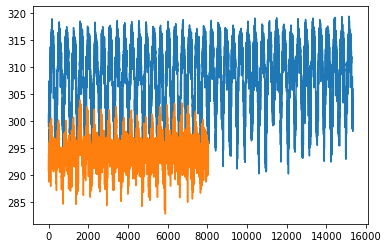

In [19]:
plt.plot(using.values, label='using')
plt.plot(orig.values, label='original')

In [20]:
using

<xarray.DataArray 'tasmax' (time: 15341)>
array([299.03231812, 300.90979004, 300.9329834 , ..., 300.77075195,
       303.07833862, 304.03512573])
Coordinates:
    city     <U12 'Mexico City'
    lat      float32 19.5
    lon      float32 0.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31

In [21]:
era5_using.sel(city='Mexico City')['tasmax'].lon.values

array(0., dtype=float32)

In [22]:
era5_using.sel(city='Moscow')['tasmax'].lon.values

array(37.5, dtype=float32)

In [23]:
era5_using.sel(city='Sao Paulo')['tasmax'].lon.values

array(0., dtype=float32)

In [24]:
era5_using.sel(city='Buenos Aires')['tasmax'].lon.values

array(0., dtype=float32)

In [25]:
era5_using.sel(city='New York')['tasmax'].lon.values

array(0., dtype=float32)

In [26]:
era5_using.sel(city='Manila')['tasmax'].lon.values

array(121., dtype=float32)

In [27]:
era5_using.sel(city='Miami')['tasmax'].lon.values

array(0., dtype=float32)

In [28]:
era5_using.sel(city='Mumbai')['tasmax'].lon.values

array(73., dtype=float32)

In [29]:
era5_using.sel(city='Lagos')['tasmax'].lon.values

array(3.5, dtype=float32)

In [39]:
'''gcm_using = xr.open_zarr('gs://downscaled-48ec31ab/diagnostics/RELEASE-v1.1/clean-daily-tasmax-diagnostics/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/day/tasmax/v1.1.zarr')'''

gcm_using = xr.open_zarr('gs://downscaled-48ec31ab/diagnostics/RELEASE-v1.1/clean-daily-tasmax-diagnostics/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/tasmax/v1.1.zarr')

In [40]:
gcm_using.sel(city='Miami')['tasmax'].lon.values

array(0.)

In [41]:
gcm_using.sel(city='Mexico City')['tasmax'].lon.values

array(0.)

In [32]:
gcm_using.sel(city='Miami')['tasmax'].lat.values

array(25.625)

In [34]:
gcm_using.sel(city='New York')['tasmax'].lon.values

array(0.9375)

In [35]:
gcm_using.sel(city='Sao Paulo')['tasmax'].lon.values

array(0.9375)

In [36]:
gcm_using.sel(city='Buenos Aires')['tasmax'].lon.values

array(0.9375)

In [37]:
ds_using = xr.open_zarr('gs://downscaled-48ec31ab/diagnostics/RELEASE-v1.1/daily-tasmax-diagnostics/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/tasmax/v1.1.zarr')

In [38]:
ds_using.sel(city='Buenos Aires')['tasmax'].lon.values

array(-58.375)